In [1]:
from verticapy import vdf_from_relation
import vertica_python
import pandas as pd
import time
pd.options.display.max_rows= 200
pd.set_option("display.max_columns", None)
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Load extension for execute sql
%load_ext verticapy.sql

In [3]:
# Displays the available connections
from verticapy.connect import *
available_auto_connection()

['VerticaDSN', 'Arti1_VerticaDB']

#### NORMALIZE()

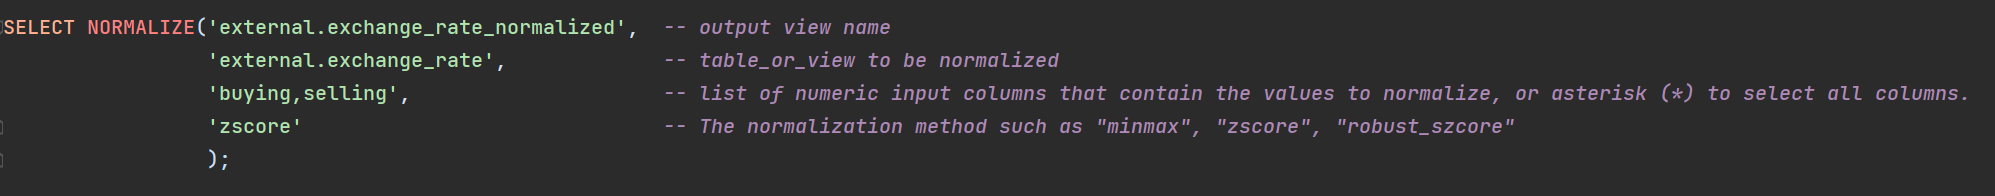

In [15]:
%%sql
SELECT NORMALIZE('external.exchange_rate_normalized',
                 'external.exchange_rate',
                 'buying,selling',
                 'zscore'
               );

Finished in 1 iteration



,123currency_idInteger,123buyingFloat,123sellingFloat,123unitInteger,AbcdateLong varchar(10)
1,1,-0.247436001531778,-0.231668418107339,1,2000-02-02
2,1,-0.24738267835981,-0.231614722939019,1,2000-02-01
3,1,-0.247366995073937,-0.231598930242454,1,2000-01-03
4,1,-0.247257212072828,-0.231486802096846,1,2000-02-03
5,1,-0.247202320572273,-0.23143152765887,1,2000-01-31

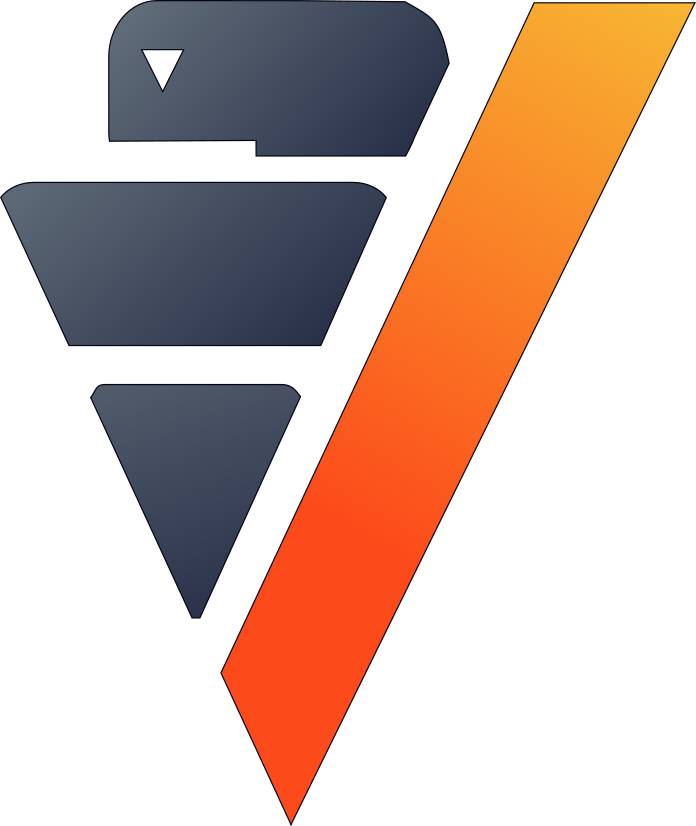

In [4]:
%%sql
SELECT * FROM external.exchange_rate_normalized LIMIT 5

#### CORR_MATRIX() OVER()

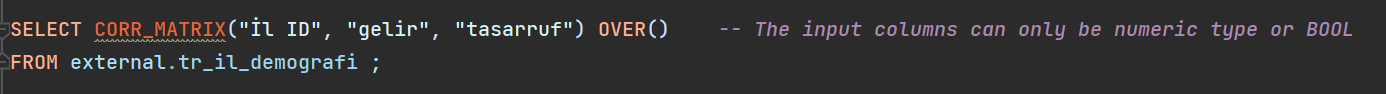

,Abcvariable_name_1Varchar(128),Abcvariable_name_2Varchar(128),123corr_valueFloat,123number_of_ignored_input_rowsInteger,123number_of_processed_input_rowsInteger
1,gelir,tasarruf,0.983108579637205,0,81
2,tasarruf,gelir,0.983108579637205,0,81
3,İl ID,gelir,-0.248338348299007,0,81
4,gelir,İl ID,-0.248338348299007,0,81
5,İl ID,tasarruf,-0.222223378801459,0,81
6,tasarruf,İl ID,-0.222223378801459,0,81
7,tasarruf,tasarruf,1.0,0,81
8,İl ID,İl ID,1.0,0,81
9,gelir,gelir,1.0,0,81

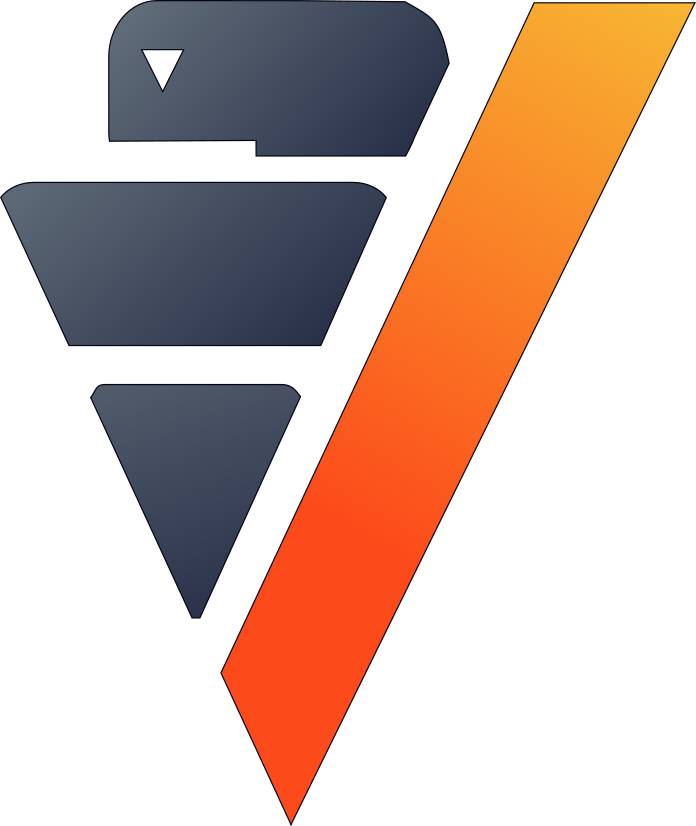

In [18]:
%%sql
SELECT CORR_MATRIX("İl ID", "gelir", "tasarruf") OVER()
FROM external.tr_il_demografi

#### DETECT_OUTLIERS()

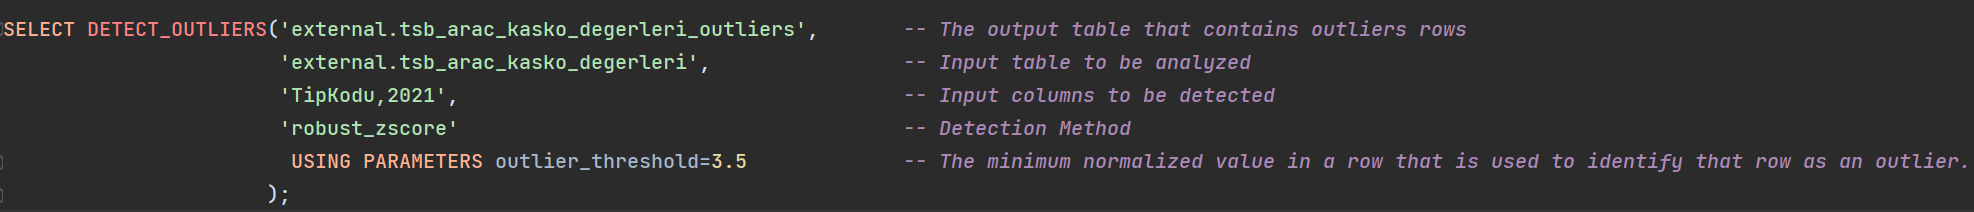

In [4]:
%%sql
SELECT DETECT_OUTLIERS('external.tsb_arac_kasko_degerleri_outliers',
                       'external.tsb_arac_kasko_degerleri',
                       'TipKodu,2021',
                       'robust_zscore'
                        USING PARAMETERS outlier_threshold=3.5
                      )

Detected 4044 outliers



,123MarkaKoduInteger,123TipKoduInteger,AbcMarkaAdıLong varchar(1048576),AbcTipAdıLong varchar(1048576),1232022Integer,1232021Integer,1232020Integer,1232019Integer,1232018Integer,1232017Integer,1232016Integer,1232015Integer,1232014Integer,1232013Integer,1232012Integer,1232011Integer,1232010Integer,1232009Integer,1232008Integer
1,3,1022,ALFA ROMEO,GIULIA 2.0 280 VELOCE AWD AT,0,1599950,1307661,1122122,1023812,958188,923345,0,0,0,0,0,0,0,0
2,3,1026,ALFA ROMEO,GIULIA 2.0 200 SPRINT RWD AT,0,1233950,1191559,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1027,ALFA ROMEO,STELVIO 2.0 200 SPRINT AWD AT,0,1443950,1331902,0,0,0,0,0,0,0,0,0,0,0,0
4,3,1028,ALFA ROMEO,STELVIO 2.0 280 VELOCE AWD AT,0,1749950,1435243,0,0,0,0,0,0,0,0,0,0,0,0
5,8,1020,ASTON MARTIN,DBS SUPERLEGGERA 5.2,0,11013000,10737815,10426411,10036292,0,0,0,0,0,0,0,0,0,0

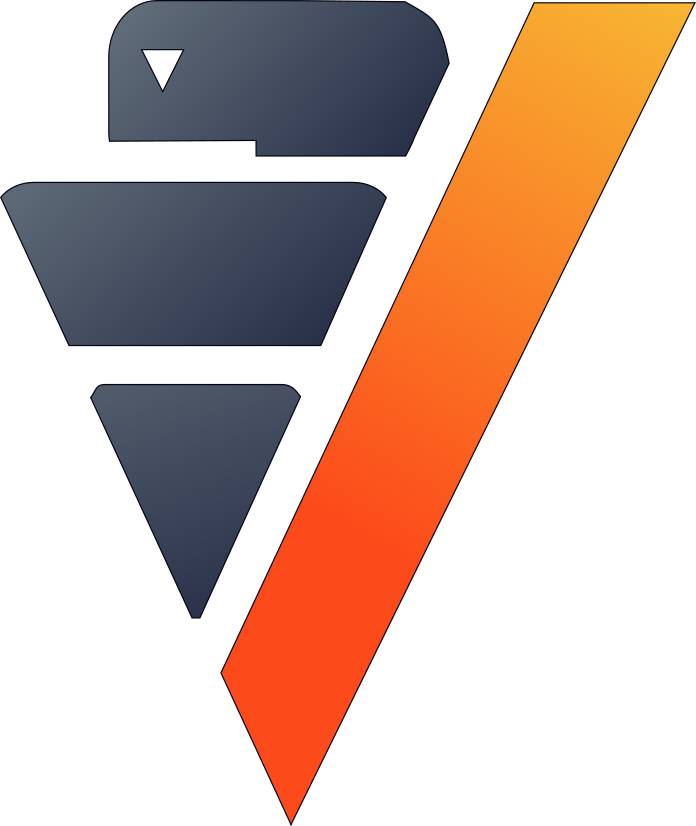

In [5]:
%%sql
SELECT * FROM external.tsb_arac_kasko_degerleri_outliers LIMIT 5

#### ONE_HOT_ENCODER_FIT()

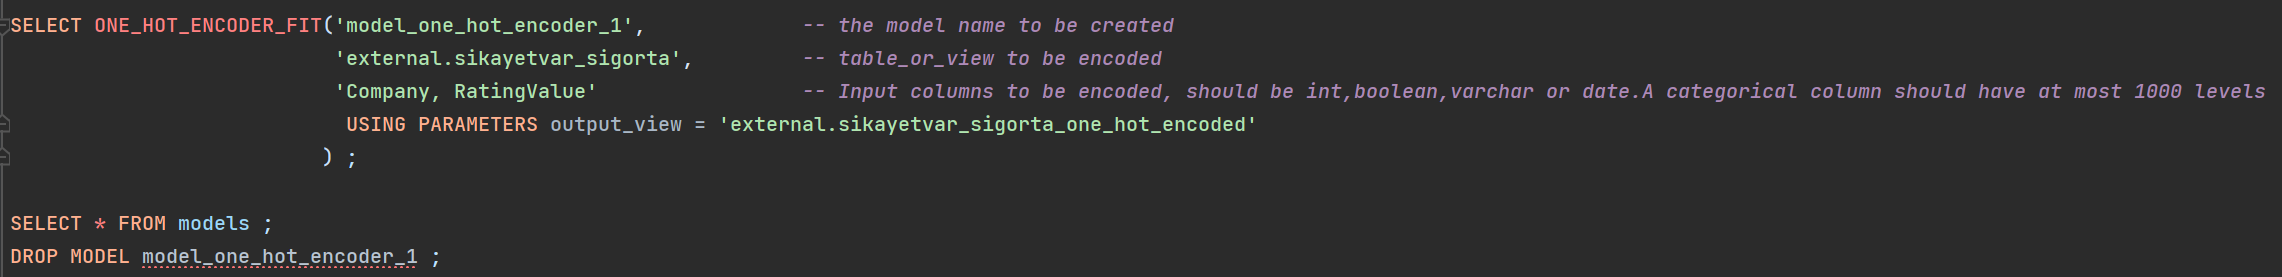

In [39]:
%%sql
SELECT ONE_HOT_ENCODER_FIT('model_one_hot_encoder_1',
                           'external.sikayetvar_sigorta',
                           'Company, RatingValue'
                            USING PARAMETERS output_view = 'external.sikayetvar_sigorta_one_hot_encoded'
                          )

Success



,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamp with timezone,123sizeInteger
1,45035996284985976,model_one_hot_encoder_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,ONE_HOT_ENCODER_FIT,✅,2022-02-28 12:23:54.226219+03:00,1910

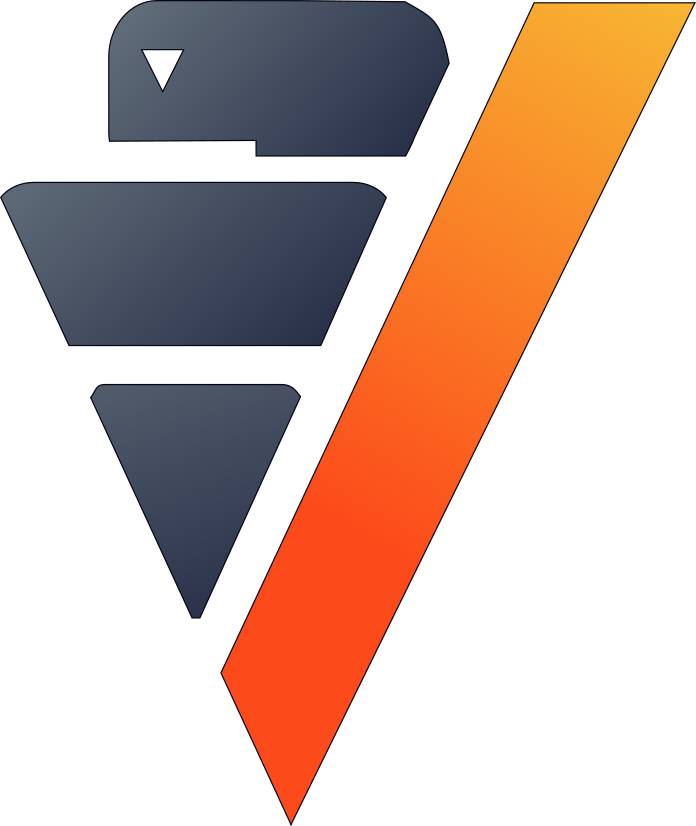

In [24]:
%%sql
SELECT * FROM models

,AbccompanyVarchar(30),123Company_1Integer,123Company_2Integer,123Company_3Integer,123Company_4Integer,AbcVarchar(150),AbcdatepublishedVarchar(10),AbcratingvalueVarchar(1),123RatingValue_1Integer,123RatingValue_2Integer,123RatingValue_3Integer,123RatingValue_4Integer,123RatingValue_5Integer,AbcLong varchar(2744)
1,Agesa Hayat Ve Emeklilik,0,1,0,0,,2017-04-17,-,0,0,0,0,0,"<input style=""background-color: #FAFAFA; border: none; text-align: center; width: 270px;"" type=""text"" value=""Akbank bankasından çekmiş olduğum krediler neticesinde ödeme zorluğu çektiğim için bankadaki kredilerimi 72 aya yapılandırma yaptım. Söz konusu yapılandırma sonrasında banka tüm kartları kullanıma kapattığı için kredi çekilirken bankanın otomatik olarak yapmış olduğu hayat sigortası kartların kapalı olması nedeniyle çekilememiştir. Bu durumdan ötürü 17.04.2017 tarihinde Avivasa Sigorta şirketi borç dokümanı göndermiştir. Bu borç dokümanından benim değil Akbank'ın sorumlu tutulacağı hususunu tarafınıza bildirerek, kartlarımın kullanıma açılması ve ödenmesi gereken primlerin ödenmesi için yapılandırma bozulması taleplerim banka tarafından vurdumduymaz hareketleriyle gerçekleştirilmemiştir. Tarafıma yansıyacak her türlü hak kaybı mağduriyet ve borçlardan Akbank ve Avivasa Sigorta'sını sorumlu tutacağımı iş bu dilekçe de taraflarınıza ihtar ederim."" readonly>"
2,Agesa Hayat Ve Emeklilik,0,1,0,0,,2018-06-01,1,1,0,0,0,0,
3,Agesa Hayat Ve Emeklilik,0,1,0,0,,2018-04-27,-,0,0,0,0,0,"<input style=""background-color: #FAFAFA; border: none; text-align: center; width: 270px;"" type=""text"" value=""Akbank benim sorunumu çözemediğiniz ve bana mail attığınız sürece size her gün şikayet yazacağım 11000 TL faiz bileğim olmadan yapılan normal değil vip sigorta ve fahiş olan kasko beni artık yordunuz bana paramın iadelerini verin bugün bankada Ç** hanım o kadın hayırdır bölge müdür yetkisi mi verildi beni hep tersliyor sırf onun yüzünden millet pos olarak çalışmaz."" readonly>"
4,Agesa Hayat Ve Emeklilik,0,1,0,0,,2017-11-16,1,1,0,0,0,0,"<input style=""background-color: #FAFAFA; border: none; text-align: center; width: 270px;"" type=""text"" value=""Akbank bireysel emeklilik sistemine benim kaynanamı üye yapmışlar ve hesabında bulunan 300 TL'sini bu sisteme bilgisi ve onayı alınmadan banka tarafından yatırılmış başta bu sistemden çıkmanız durumunda yatırılan parayı vermeyiz diye bir şey söylenmemiş ve bu 300 TL'yi iade etmiyorlar, kaldı ki bu kadın zaten kocası tarafından emekli 50 yaşında birinin ne gerek var bireysel emeklilik sistemine bir de bu sözleşmeyi yapan arkadaş ayrıldı diyorlar, bu paranın iadesini istiyorum."" readonly>"
5,Agesa Hayat Ve Emeklilik,0,1,0,0,,2018-01-28,-,0,0,0,0,0,

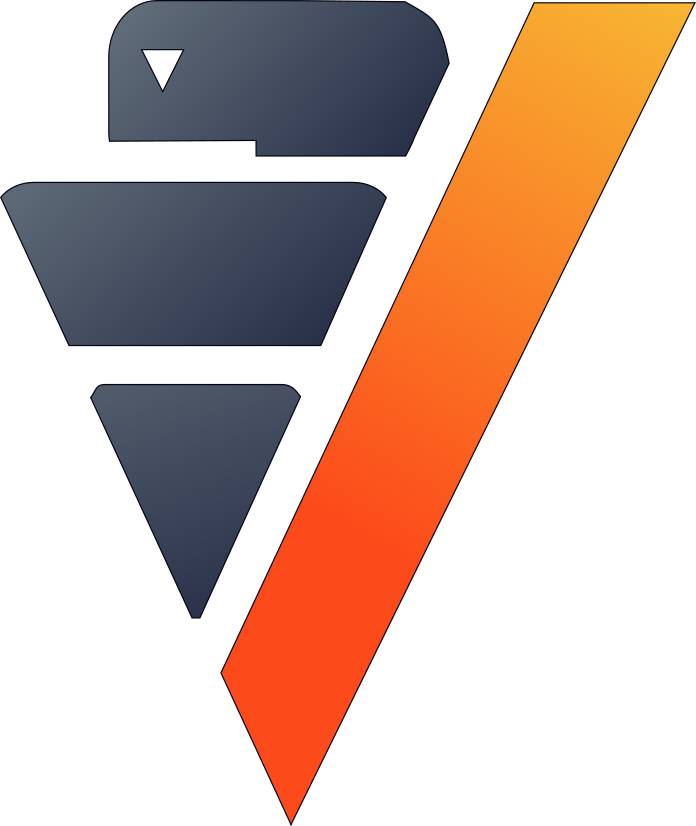

In [26]:
%%sql
SELECT * FROM external.sikayetvar_sigorta_one_hot_encoded LIMIT 5

In [27]:
%%sql
DROP MODEL model_one_hot_encoder_1

DROP


#### LINEAR_REG()

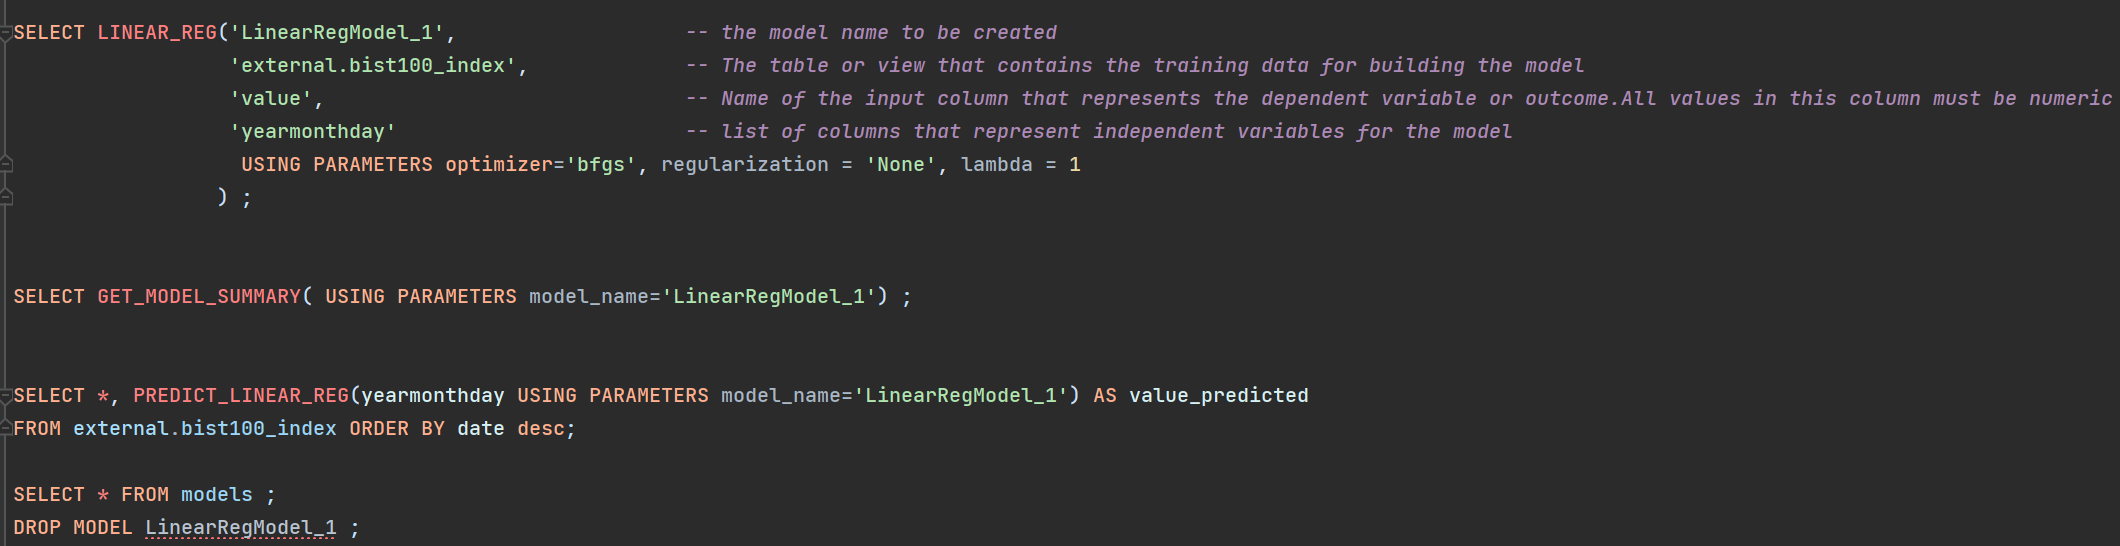

In [28]:
%%sql
SELECT LINEAR_REG('LinearRegModel_1',
                  'external.bist100_index',
                  'value',
                  'yearmonthday'
                   USING PARAMETERS optimizer='bfgs', regularization = 'None', lambda = 1
                 )

Finished in 3 iterations



,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamp with timezone,123sizeInteger
1,45035996284987402,LinearRegModel_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,LINEAR_REGRESSION,✅,2022-02-28 15:33:16.210319+03:00,1675
2,45035996284987588,model_one_hot_encoder_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,ONE_HOT_ENCODER_FIT,✅,2022-02-28 15:42:55.130923+03:00,1910

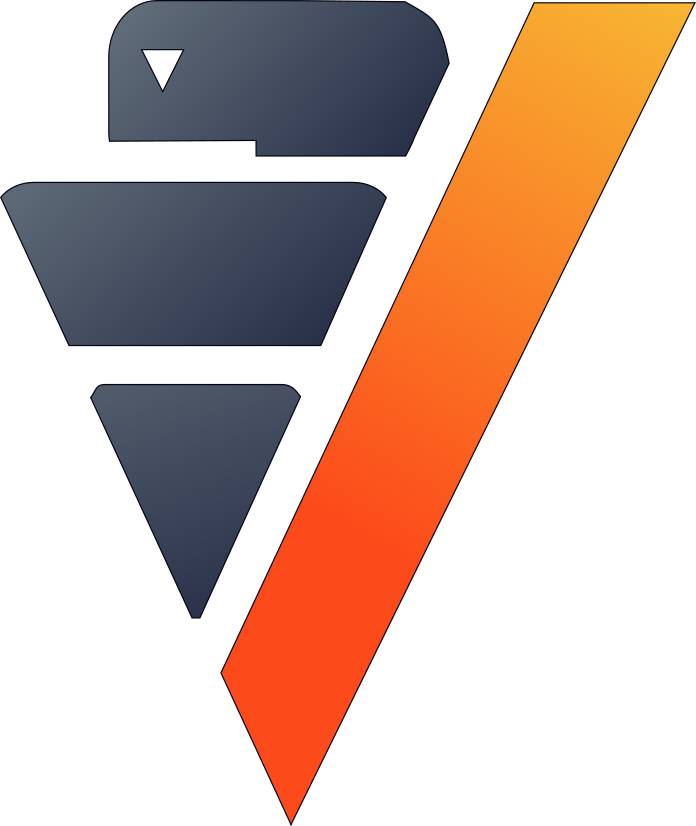

In [40]:
%%sql
SELECT * FROM models

,123yearmonthdayInteger,📅dateDate,123valueInteger,123value_predictedFloat
1,20211116,2021-11-16,1686,1180.33066521511
2,20211115,2021-11-15,1702,1180.32511246385
3,20211112,2021-11-12,1638,1180.30845421008
4,20211111,2021-11-11,1625,1180.30290145882
5,20211110,2021-11-10,1624,1180.29734870757

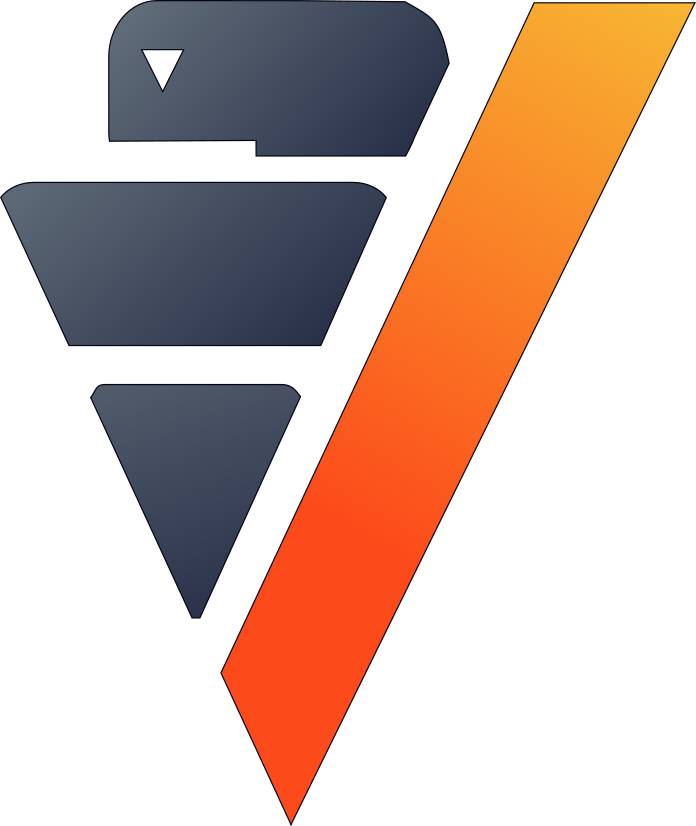

In [36]:
%%sql
SELECT *, PREDICT_LINEAR_REG(yearmonthday
                             USING PARAMETERS model_name='LinearRegModel_1') AS value_predicted
FROM external.bist100_index
ORDER BY date desc
LIMIT 5

In [41]:
%%sql
DROP MODEL LinearRegModel_1

DROP


#### KMEANS CLUSTER

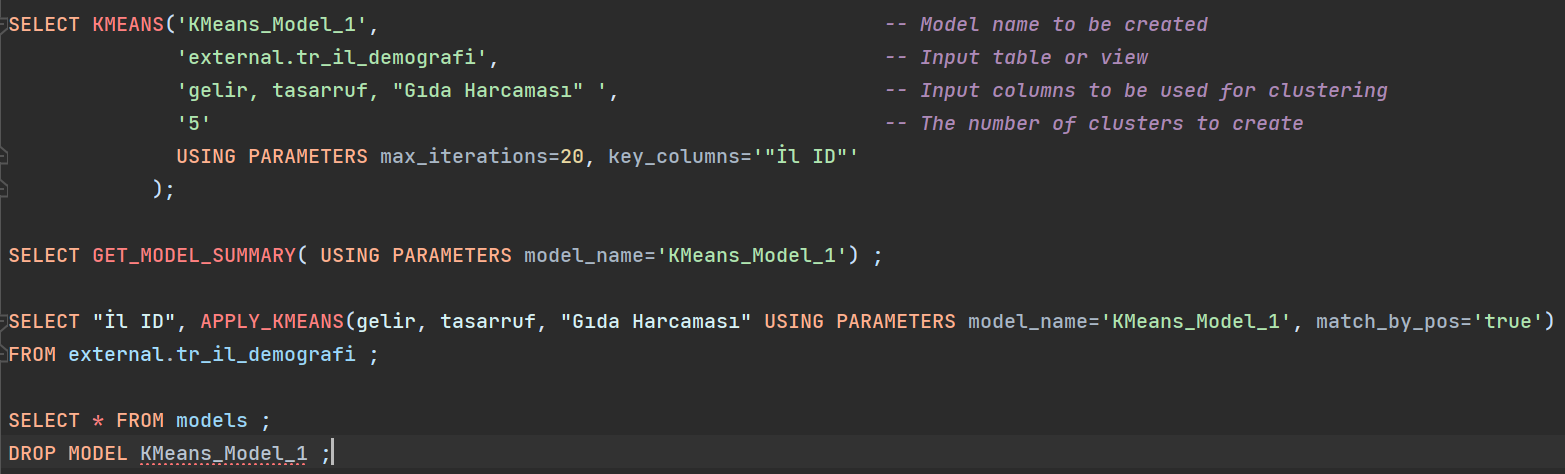

In [6]:
%%sql
SELECT KMEANS('KMeans_Model_1',                                         
              'external.tr_il_demografi',                               
              'gelir, tasarruf, "Gıda Harcaması" ',                      
              '5'                                                       
              USING PARAMETERS max_iterations=20, key_columns='"İl ID"'
            )

Finished in 6 iterations



,123model_idInteger,Abcmodel_nameVarchar(128),123schema_idInteger,Abcschema_nameVarchar(128),123owner_idInteger,Abcowner_nameVarchar(128),AbccategoryVarchar(128),Abcmodel_typeVarchar(128),010is_completeBoolean,📅create_timeTimestamp with timezone,123sizeInteger
1,45035996284987588,model_one_hot_encoder_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,ONE_HOT_ENCODER_FIT,✅,2022-02-28 15:42:55.130923+03:00,1910
2,45035996284987664,RF_Model_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,RF_CLASSIFIER,✅,2022-02-28 15:51:46.644733+03:00,65693
3,45035996284997344,KMeans_Model_1,45035996273704980,public,45035996273704962,dbadmin,VERTICA_MODELS,KMEANS,✅,2022-03-01 15:52:49.420483+03:00,4550

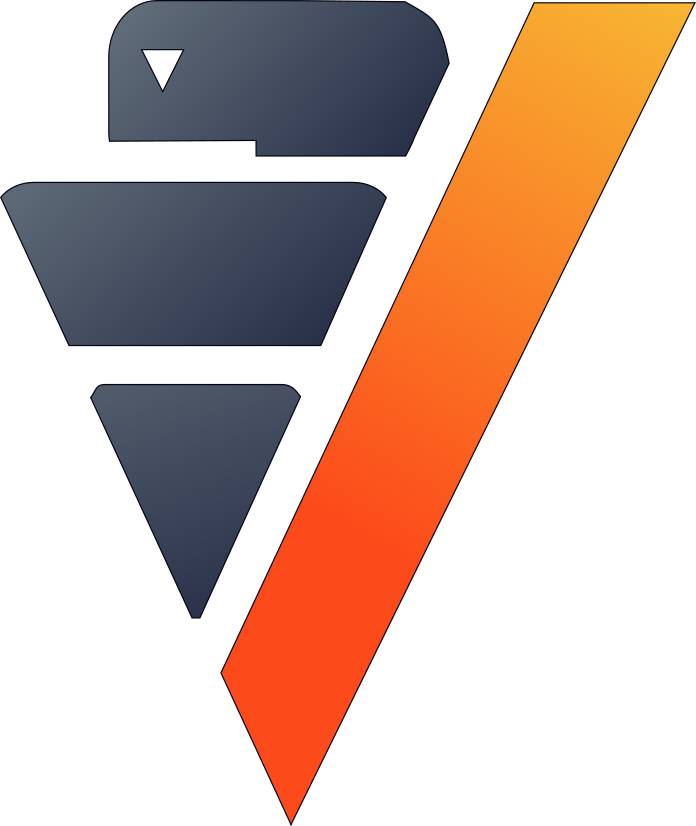

In [10]:
%%sql
SELECT * FROM models 

,123İl IDInteger,123APPLY_KMEANSInteger
1,3969,1
2,3971,0
3,3972,3
4,3973,3
5,3974,3

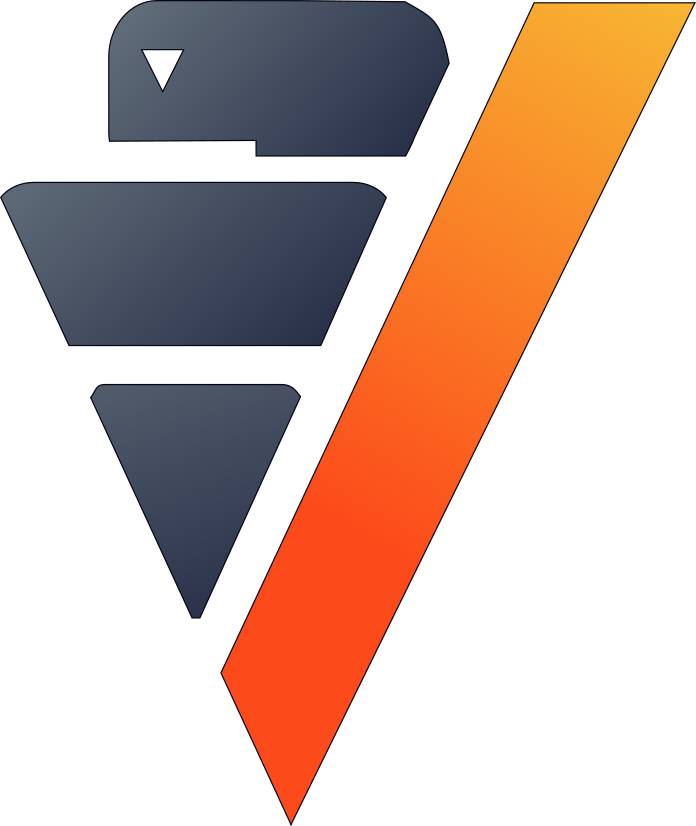

In [9]:
%%sql
SELECT "İl ID", APPLY_KMEANS(gelir, tasarruf, "Gıda Harcaması" USING PARAMETERS model_name='KMeans_Model_1',match_by_pos='true')
FROM external.tr_il_demografi
LIMIT 5

#### RANDOM FOREST CLASSIFIER()

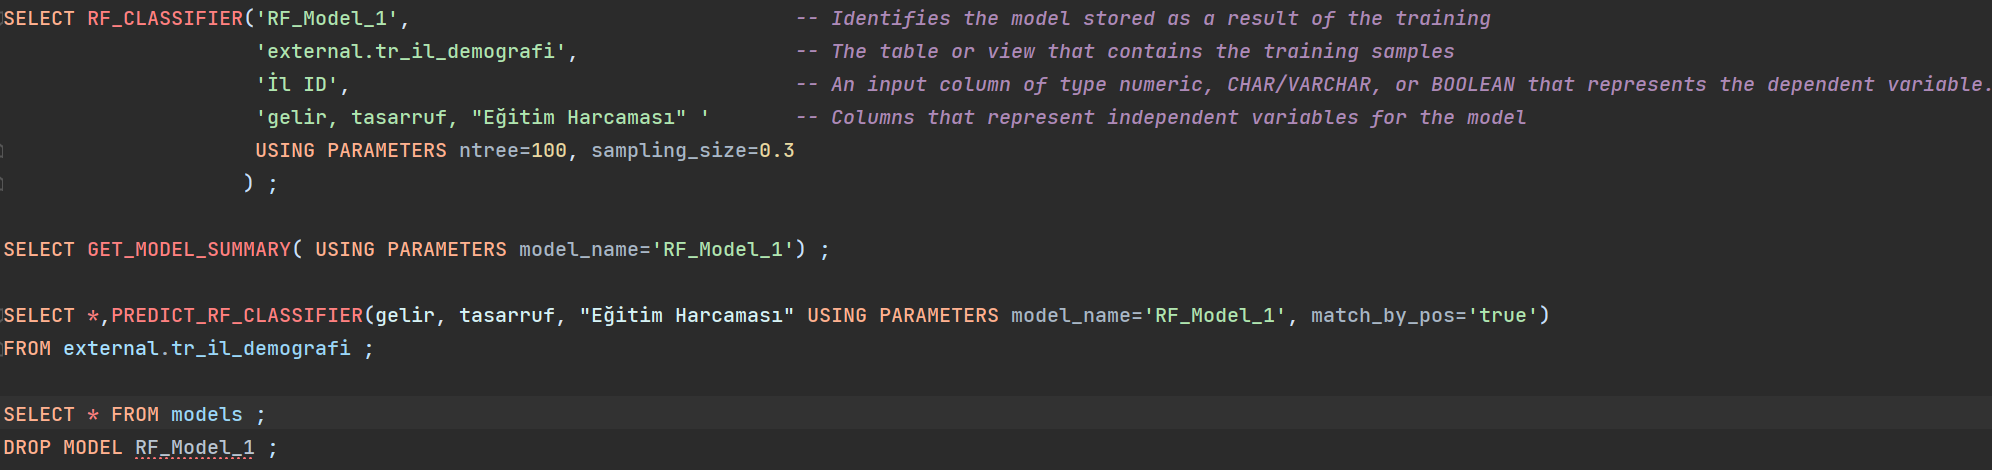

In [42]:
%%sql
SELECT RF_CLASSIFIER('RF_Model_1',
                     'external.tr_il_demografi',
                     'İl ID',
                     'gelir, tasarruf, "Eğitim Harcaması" '
                     USING PARAMETERS ntree=100, sampling_size=0.3
                    )

Finished


,123İl IDInteger,Abcİl AdıLong varchar(1048576),123A+ GrubuInteger,123A GrubuInteger,123B GrubuInteger,123C GrubuInteger,123D GrubuInteger,123gelirFloat,123tasarrufFloat,123Gıda HarcamasıFloat,123Alkol Tütün HarcamasıFloat,123İletişim HarcamasıFloat,123Barınma HarcamasıFloat,123Giyim HarcamasıFloat,123Mobilya Ev Eşyası HarcamasıFloat,123Sağlık HarcamasıFloat,123Ulaşım HarcamasıFloat,123Eğlence HarcamasıFloat,123Eğitim HarcamasıFloat,123Restoran HarcamasıFloat,123Diğer HarcamalarFloat,AbcPREDICT_RF_CLASSIFIERVarchar(128)
1,3969,İstanbul,352856,3118351,4568334,3977726,3447664,8571.88,926.53,1185.03,282.73,275.02,2346.98,344.03,413.06,183.7,1254.05,252.44,252.44,565.97,298.1,3968
2,3971,Adana,26636,427019,608645,563768,620039,3023.38,258.33,591.79,138.25,88.39,647.09,138.25,182.42,63.71,503.15,69.13,46.89,149.38,140.97,3971
3,3972,Ağrı,1053,38571,70554,94214,114960,3547.28,300.54,951.43,230.46,126.68,743.56,181.74,198.0,42.34,454.54,71.32,22.59,119.99,107.28,3972
4,3973,Ankara,159457,1243203,1599710,1355648,1310436,3991.13,367.88,626.94,148.52,144.93,934.94,166.58,210.29,57.89,717.55,112.29,119.68,239.05,144.93,3968
5,3974,Batman,1662,60205,98633,151880,184944,3719.97,316.03,1038.2,183.9,119.13,691.14,289.34,187.22,61.38,473.2,57.72,30.69,173.55,102.12,3974

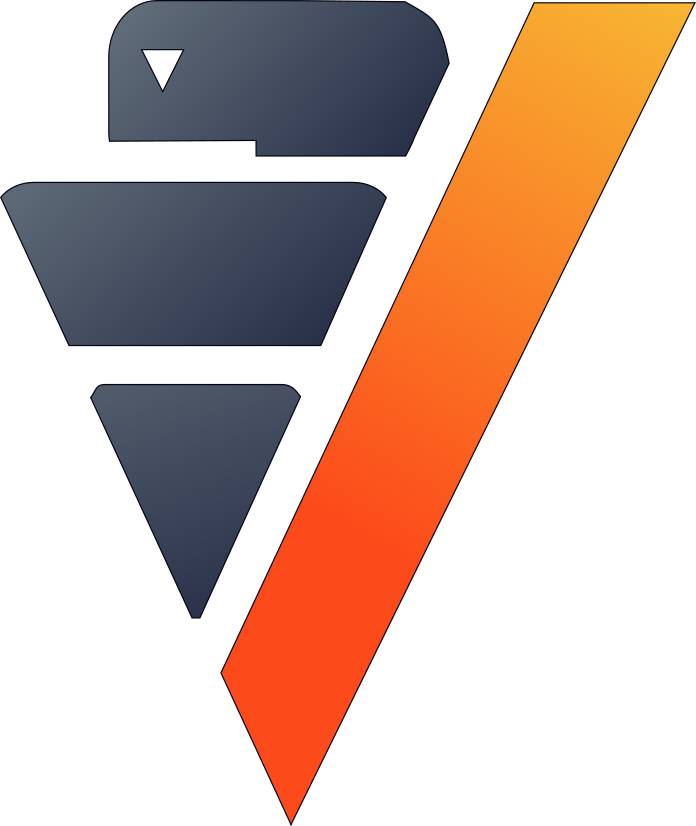

In [45]:
%%sql
SELECT *, PREDICT_RF_CLASSIFIER(gelir,tasarruf, "Eğitim Harcaması"
                                USING PARAMETERS model_name='RF_Model_1',
                                match_by_pos='true'
                                )
FROM external.tr_il_demografi
LIMIT 5